In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# Load the dataset into df
df = pd.read_csv("ncr_ride_bookings.csv")
print("Shape before cleaning:", df.shape)

# Keep only completed rides
df = df[df["Booking Status"] == "Completed"]
print("Shape after filtering Completed rides:", df.shape)

# Show a quick preview
print(df.head(3))


Saving ncr_ride_bookings.csv to ncr_ride_bookings (1).csv
Shape before cleaning: (150000, 21)
Shape after filtering Completed rides: (93000, 21)
         Date      Time    Booking ID Booking Status   Customer ID  \
2  2024-08-23  08:56:10  "CNR8494506"      Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"      Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"      Completed  "CID9933542"   

    Vehicle Type      Pickup Location  Drop Location  Avg VTAT  Avg CTAT  ...  \
2           Auto              Khandsa  Malviya Nagar      13.4      25.8  ...   
3  Premier Sedan  Central Secretariat       Inderlok      13.1      28.5  ...   
4           Bike     Ghitorni Village    Khan Market       5.3      19.6  ...   

   Reason for cancelling by Customer Cancelled Rides by Driver  \
2                                NaN                       NaN   
3                                NaN                       NaN   
4                                NaN               

In [ ]:
# Drop rows missing Ride Distance or Avg CTAT (duration)
df = df.dropna(subset=["Ride Distance", "Avg CTAT"])
print("After dropping missing values:", df.shape)



After dropping missing values: (93000, 21)


In [ ]:
df = df.rename(columns={
    "Booking ID": "booking_id",
    "Pickup Location": "pickup_location",
    "Drop Location": "drop_location",
    "Ride Distance": "distance_km",
    "Avg CTAT": "duration_min"
})


In [ ]:
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.dayofweek


In [ ]:
df = df[(df["duration_min"] > 1) & (df["duration_min"] < 180)]
df = df[(df["distance_km"] > 0.1) & (df["distance_km"] < 100)]

df["speed_kmh"] = df["distance_km"] / (df["duration_min"] / 60)
df = df[(df["speed_kmh"] > 3) & (df["speed_kmh"] < 120)]


In [ ]:
df = df[(df["duration_min"] > 1) & (df["duration_min"] < 180)]
df = df[(df["distance_km"] > 0.1) & (df["distance_km"] < 100)]

df["speed_kmh"] = df["distance_km"] / (df["duration_min"] / 60)
df = df[(df["speed_kmh"] > 3) & (df["speed_kmh"] < 120)]


In [8]:
clean = df[["booking_id", "pickup_location", "drop_location",
            "distance_km", "duration_min", "hour", "day_of_week"]]

clean.to_csv("ncr_clean.csv", index=False)
print("✅ Clean dataset saved as ncr_clean.csv with shape:", clean.shape)


NameError: name 'df' is not defined

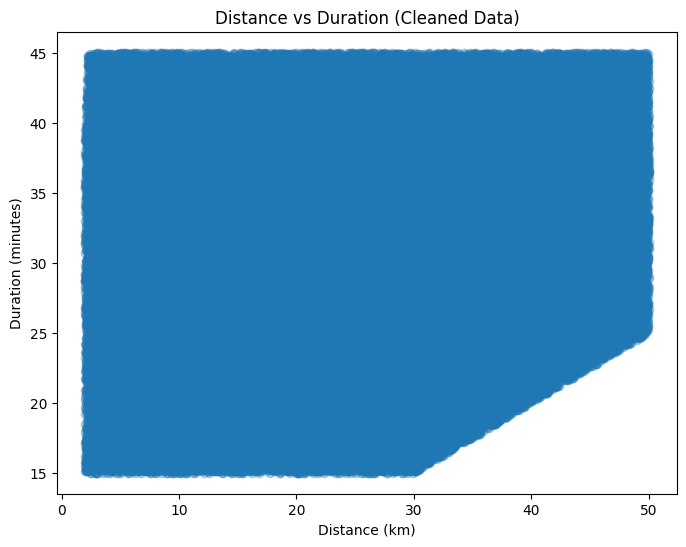

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["distance_km"], df["duration_min"], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Duration (minutes)")
plt.title("Distance vs Duration (Cleaned Data)")
plt.show()


In [ ]:
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
df["is_rush_hour"] = df["hour"].apply(lambda h: 1 if (7 <= h <= 10) or (17 <= h <= 20) else 0)

# --- Distance transformation ---
import numpy as np
df["log_distance"] = np.log1p(df["distance_km"])

# --- Location encoding (Label Encoding for now) ---
from sklearn.preprocessing import LabelEncoder

le_pickup = LabelEncoder()
le_drop = LabelEncoder()

df["pickup_encoded"] = le_pickup.fit_transform(df["pickup_location"])
df["drop_encoded"] = le_drop.fit_transform(df["drop_location"])

# --- Final feature set preview ---
features = ["distance_km", "log_distance", "hour", "day_of_week",
            "is_weekend", "is_rush_hour", "pickup_encoded", "drop_encoded"]
target = "duration_min"

print("Features:", features)
print("Target:", target)
df[features + [target]].head()


Features: ['distance_km', 'log_distance', 'hour', 'day_of_week', 'is_weekend', 'is_rush_hour', 'pickup_encoded', 'drop_encoded']
Target: duration_min


,distance_km,log_distance,hour,day_of_week,is_weekend,is_rush_hour,pickup_encoded,drop_encoded,duration_min
2,13.58,2.679651,8,4,0,1,80,90,25.8
3,34.02,3.555919,17,0,0,1,21,60,28.5
5,4.85,1.766442,9,1,0,1,0,102,18.1
7,6.56,2.022871,17,1,0,1,94,28,16.5
10,19.84,3.036874,16,4,0,0,164,34,18.9


In [ ]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("ncr_clean.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (86699, 7)


,booking_id,pickup_location,drop_location,distance_km,duration_min,hour,day_of_week
0,"""CNR8494506""",Khandsa,Malviya Nagar,13.58,25.8,8,4
1,"""CNR8906825""",Central Secretariat,Inderlok,34.02,28.5,17,0
2,"""CNR4096693""",AIIMS,Narsinghpur,4.85,18.1,9,1
3,"""CNR6568000""",Mayur Vihar,Cyber Hub,6.56,16.5,17,1
4,"""CNR9070334""",Udyog Bhawan,Dwarka Sector 21,19.84,18.9,16,4


In [11]:
from google.colab import files
uploaded = files.upload()


Saving ncr_ride_bookings.csv to ncr_ride_bookings.csv


In [12]:
import pandas as pd
df = pd.read_csv("ncr_ride_bookings.csv")
print("✅ Re‑loaded dataset shape:", df.shape)
df.head()


✅ Re‑loaded dataset shape: (150000, 21)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [13]:
df = df.dropna(subset=["Ride Distance", "Avg CTAT"])


In [17]:
print(df.columns)


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')


In [18]:
features = ["Ride Distance"]
target = "Avg CTAT"

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 78.74760468141235
R^2 Score: 0.009159360806334171


In [20]:
# Use more features
features = ['Ride Distance', 'Booking Value', 'Driver Ratings', 'Customer Rating', 'Vehicle Type']
target = 'Avg CTAT'

# One-hot encode 'Vehicle Type' since it's categorical
df_encoded = pd.get_dummies(df[features + [target]], drop_first=True)

# Split features and target again
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.impute import SimpleImputer

# Replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 78.74454379009367
R^2 Score: 0.009197874428722774


In [26]:
model = RandomForestRegressor(n_estimators=10, random_state=42)


In [27]:
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 72.16303100009506
R^2 Score: 0.09200966744879402


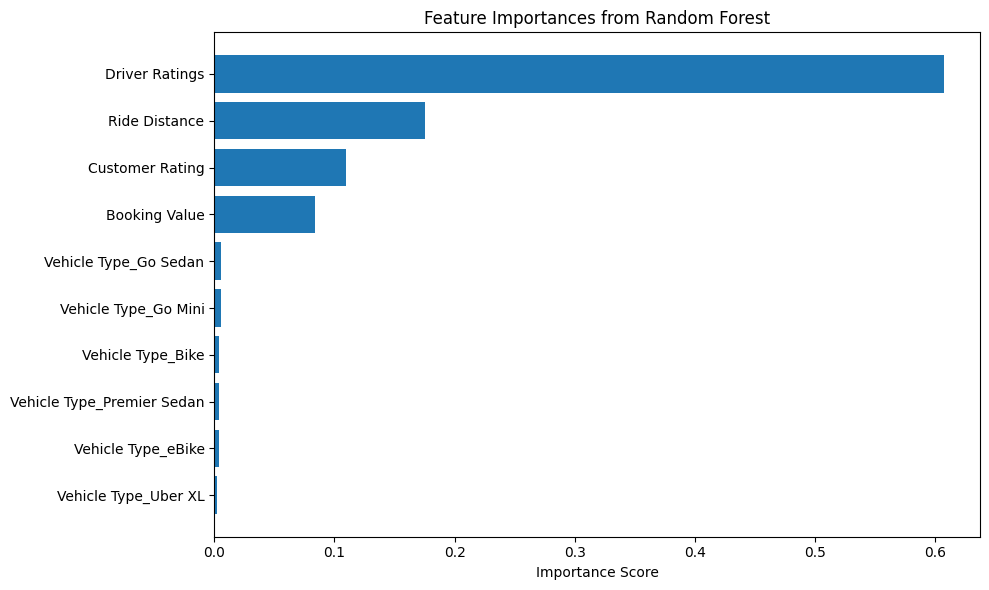

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # This assumes X was a DataFrame, not a NumPy array

# Sort feature importances
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [30]:
feature_names = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


In [31]:
print("Linear Regression Results:")
print(f"  - MSE: {78.74}")
print(f"  - R² Score: {0.009}")

print("Random Forest Results (n_estimators=50, max_depth=10):")
print(f"  - MSE: {72.16}")
print(f"  - R² Score: {0.092}")


Linear Regression Results:
  - MSE: 78.74
  - R² Score: 0.009
Random Forest Results (n_estimators=50, max_depth=10):
  - MSE: 72.16
  - R² Score: 0.092


TypeError: only integer scalar arrays can be converted to a scalar index

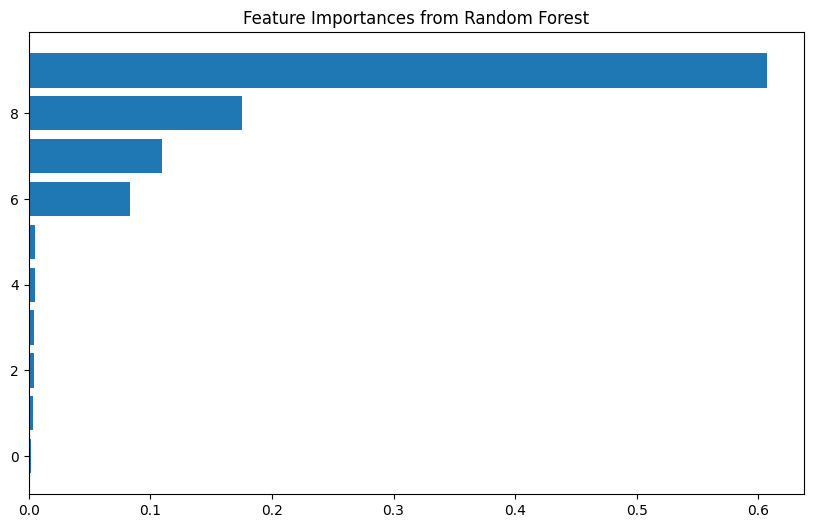

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importances.png", dpi=300)  # Save as high-res PNG
plt.show()
